In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
train=pd.read_csv('Data_Train.csv')
test=pd.read_csv('Test_set.csv')

In [3]:
train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [4]:
train['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [5]:
test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL ? BOM ? COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? MAA ? BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR ? DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU ? DEL ? BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU ? BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,04:00,19:15,15h 15m,1 stop,No info


In [6]:
train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
train.dropna(inplace=True)

In [8]:
len(train)

10682

In [9]:
test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
Airline            10682 non-null object
Date_of_Journey    10682 non-null object
Source             10682 non-null object
Destination        10682 non-null object
Route              10682 non-null object
Dep_Time           10682 non-null object
Arrival_Time       10682 non-null object
Duration           10682 non-null object
Total_Stops        10682 non-null object
Additional_Info    10682 non-null object
Price              10682 non-null int64
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


In [11]:
train['Journey_Day']=pd.to_datetime(train.Date_of_Journey, format='%d/%m/%Y').dt.day
train['Journey_Month']=pd.to_datetime(train.Date_of_Journey, format='%d/%m/%Y').dt.month
train.drop(labels = 'Date_of_Journey',axis=1,inplace=True)

In [12]:
test['Journey_Day']=pd.to_datetime(test.Date_of_Journey, format='%d/%m/%Y').dt.day
test['Journey_Month']=pd.to_datetime(test.Date_of_Journey, format='%d/%m/%Y').dt.month
test.drop(labels = 'Date_of_Journey',axis=1,inplace=True)

In [13]:
train

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month
0,IndiGo,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,4
10679,Air India,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4
10680,Jet Airways,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229,27,4
10681,Vistara,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648,1,3


In [14]:
train['Duration']=train['Duration'].str.replace("h",'*60').str.replace(' ','+').str.replace('m','*1').apply(eval)
test['Duration']=test['Duration'].str.replace("h",'*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [15]:
train['Duration']

0         170
1         445
2        1140
3         325
4         285
         ... 
10678     150
10679     155
10680     180
10681     160
10682     500
Name: Duration, Length: 10682, dtype: int64

In [16]:
train['Dep_time_hr']=pd.to_datetime(train.Dep_Time).dt.hour
train['Dep_time_min']=pd.to_datetime(train.Dep_Time).dt.minute
train.drop(labels ='Dep_Time',axis = 1,inplace=True)
train['Arr_time_hr']=pd.to_datetime(train.Arrival_Time).dt.hour
train['Arr_time_min']=pd.to_datetime(train.Arrival_Time).dt.minute
train.drop(labels ='Arrival_Time',axis = 1,inplace=True)

In [17]:
test['Dep_time_hr']=pd.to_datetime(test.Dep_Time).dt.hour
test['Dep_time_min']=pd.to_datetime(test.Dep_Time).dt.minute
test.drop(labels ='Dep_Time',axis = 1,inplace=True)
test['Arr_time_hr']=pd.to_datetime(test.Arrival_Time).dt.hour
test['Arr_time_min']=pd.to_datetime(test.Arrival_Time).dt.minute
test.drop(labels ='Arrival_Time',axis = 1,inplace=True)

In [18]:
test

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Dep_time_hr,Dep_time_min,Arr_time_hr,Arr_time_min
0,Jet Airways,Delhi,Cochin,DEL ? BOM ? COK,655,1 stop,No info,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU ? MAA ? BLR,240,1 stop,No info,12,5,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL ? BOM ? COK,1425,1 stop,In-flight meal not included,21,5,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL ? BOM ? COK,780,1 stop,No info,21,5,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR ? DEL,170,non-stop,No info,24,6,23,55,2,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU ? DEL ? BLR,1435,1 stop,No info,6,6,20,30,20,25
2667,IndiGo,Kolkata,Banglore,CCU ? BLR,155,non-stop,No info,27,3,14,20,16,55
2668,Jet Airways,Delhi,Cochin,DEL ? BOM ? COK,395,1 stop,No info,6,3,21,50,4,25
2669,Air India,Delhi,Cochin,DEL ? BOM ? COK,915,1 stop,No info,6,3,4,0,19,15


In [19]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [20]:
modify=train.dtypes.loc[train.dtypes=='object'].index
print (modify)

Index(['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info'],
      dtype='object')


In [21]:
for i in modify:
    train[i]=le.fit_transform(train[i])
    test[i]=le.fit_transform(test[i])

In [22]:
print(train.dtypes)
print(test.dtypes)

Airline            int32
Source             int32
Destination        int32
Route              int32
Duration           int64
Total_Stops        int32
Additional_Info    int32
Price              int64
Journey_Day        int64
Journey_Month      int64
Dep_time_hr        int64
Dep_time_min       int64
Arr_time_hr        int64
Arr_time_min       int64
dtype: object
Airline            int32
Source             int32
Destination        int32
Route              int32
Duration           int64
Total_Stops        int32
Additional_Info    int32
Journey_Day        int64
Journey_Month      int64
Dep_time_hr        int64
Dep_time_min       int64
Arr_time_hr        int64
Arr_time_min       int64
dtype: object


Airline               AxesSubplot(0.125,0.536818;0.0945122x0.343182)
Source             AxesSubplot(0.238415,0.536818;0.0945122x0.343182)
Destination        AxesSubplot(0.351829,0.536818;0.0945122x0.343182)
Route              AxesSubplot(0.465244,0.536818;0.0945122x0.343182)
Duration           AxesSubplot(0.578659,0.536818;0.0945122x0.343182)
Total_Stops        AxesSubplot(0.692073,0.536818;0.0945122x0.343182)
Additional_Info    AxesSubplot(0.805488,0.536818;0.0945122x0.343182)
Price                    AxesSubplot(0.125,0.125;0.0945122x0.343182)
Journey_Day           AxesSubplot(0.238415,0.125;0.0945122x0.343182)
Journey_Month         AxesSubplot(0.351829,0.125;0.0945122x0.343182)
Dep_time_hr           AxesSubplot(0.465244,0.125;0.0945122x0.343182)
Dep_time_min          AxesSubplot(0.578659,0.125;0.0945122x0.343182)
Arr_time_hr           AxesSubplot(0.692073,0.125;0.0945122x0.343182)
Arr_time_min          AxesSubplot(0.805488,0.125;0.0945122x0.343182)
dtype: object

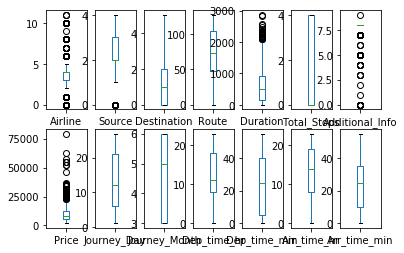

In [23]:
train.plot(kind='box',layout=(2,7),subplots=True)

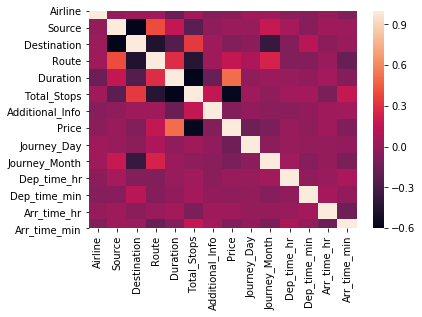

In [24]:
import seaborn as sns
sns.heatmap(train.corr())

In [25]:
train.skew()

Airline            0.731057
Source            -0.424023
Destination        1.244046
Route             -0.501911
Duration           0.861411
Total_Stops        0.631532
Additional_Info   -1.779689
Price              1.812405
Journey_Day        0.118174
Journey_Month     -0.387409
Dep_time_hr        0.112924
Dep_time_min       0.167234
Arr_time_hr       -0.370146
Arr_time_min       0.110945
dtype: float64

In [26]:
from scipy.stats import zscore
dt=abs(zscore(train))
print(train.shape)
train_new=train.loc[(dt<3).all(axis=1)]
print(train_new.shape)

(10682, 14)
(10512, 14)


In [27]:
train_new.skew()

Airline            0.729341
Source            -0.438281
Destination        1.264032
Route             -0.505646
Duration           0.778780
Total_Stops        0.613857
Additional_Info   -1.529090
Price              0.412947
Journey_Day        0.108391
Journey_Month     -0.417521
Dep_time_hr        0.103883
Dep_time_min       0.171399
Arr_time_hr       -0.362289
Arr_time_min       0.107822
dtype: float64

In [28]:
for i in train_new.columns:
    if train_new.skew().loc[i]>0.55:
        train_new[i]=np.sqrt(train_new[i])
        
print(train_new.skew())
    

Airline           -0.481716
Source            -0.438281
Destination        0.020806
Route             -0.505646
Duration           0.314401
Total_Stops        0.389953
Additional_Info   -1.529090
Price              0.412947
Journey_Day        0.108391
Journey_Month     -0.417521
Dep_time_hr        0.103883
Dep_time_min       0.171399
Arr_time_hr       -0.362289
Arr_time_min       0.107822
dtype: float64


In [29]:
x_train=train_new.drop(columns=['Price'])
y_train=train_new['Price']
x_test=test

In [30]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import r2_score,accuracy_score


In [31]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print('Score of the model:',lr.score(x_train,y_train))
print('Cross val score:',cross_val_score(lr,x_train,y_train,cv=5).mean())


Score of the model: 0.47418026038202105
Cross val score: 0.4720704941006327


In [32]:
from sklearn.tree import DecisionTreeRegressor
dr=DecisionTreeRegressor()
dr.fit(x_train,y_train)
y_pred=dr.predict(x_test)
print('Score of the model:',dr.score(x_train,y_train))
print('Cross val score:',cross_val_score(dr,x_train,y_train,cv=5).mean())

Score of the model: 0.9936289503455832
Cross val score: 0.8815734316556101


In [33]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train,y_train)
y_pred=svr.predict(x_test)
print('Score of the model:',svr.score(x_train,y_train))
print('Cross val score:',cross_val_score(svr,x_train,y_train,cv=5).mean())

Score of the model: -0.020187481383151074
Cross val score: -0.022634837713426937


In [34]:
from sklearn.neighbors import KNeighborsRegressor
kn=KNeighborsRegressor()
kn.fit(x_train,y_train)
y_pred=kn.predict(x_test)
print('Score of the model:',kn.score(x_train,y_train))
print('Cross val score:',cross_val_score(kn,x_train,y_train,cv=5).mean())

Score of the model: 0.8393375197310846
Cross val score: 0.715169845614193


In [35]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
print('Score of the model:',rf.score(x_train,y_train))
print('Cross val score:',cross_val_score(rf,x_train,y_train,cv=5).mean())

Score of the model: 0.9822153396259078
Cross val score: 0.9149374294163861


In [36]:
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor
from sklearn.model_selection import GridSearchCV

In [37]:
gbr=GradientBoostingRegressor()
parameters={'learning_rate':[0.001,0.01,0.1,1],'n_estimators':[10,50,100,1000]}
clf=GridSearchCV(gbr,parameters,cv=10)
clf.fit(x_train,y_train)
clf.best_params_

{'learning_rate': 1, 'n_estimators': 1000}

In [38]:
gbr=GradientBoostingRegressor(learning_rate=1,n_estimators=1000)
gbr.fit(x_train,y_train)
y_pred=gbr.predict(x_test)
print('Score of the model:',gbr.score(x_train,y_train))
print('Cross val score:',cross_val_score(gbr,x_train,y_train,cv=10).mean())

Score of the model: 0.9732449927985726
Cross val score: 0.923871141529942


In [39]:
adb=AdaBoostRegressor()
parameters={'learning_rate':[0.001,0.01,0.1,1],'n_estimators':[10,50,100,1000]}
clf=GridSearchCV(adb,parameters,cv=10)
clf.fit(x_train,y_train)
clf.best_params_

{'learning_rate': 0.01, 'n_estimators': 1000}

In [40]:
adb=AdaBoostRegressor(learning_rate=0.01,n_estimators=1000)
adb.fit(x_train,y_train)
y_pred=adb.predict(x_test)
print('Score of the model:',adb.score(x_train,y_train))
print('Cross val score:',cross_val_score(adb,x_train,y_train,cv=10).mean())

Score of the model: 0.6896528868838416
Cross val score: 0.6830830801688039


In [ ]:
from sklearn.externals import joblib
joblib.dump(gbr,'Flight_ticket')